In [2]:
# import xml.etree.ElementTree as ET
# import csv

# # Charger le fichier XML
# tree = ET.parse("CRSANR5L16S2024O1N220.xml")
# root = tree.getroot()

# # Namespace (important pour trouver les balises)
# ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}

# # Extraire la date de la séance
# date_seance = root.find(".//ns:dateSeanceJour", ns).text.strip()

# # Stocker les résultats
# rows = []

# # Parcourir les points de l'ordre du jour pour trouver le contexte
# for point in root.findall(".//ns:point", ns):
#     sujet = point.find("ns:texte", ns)
#     sujet_texte = sujet.text.strip() if sujet is not None else ""

#     # Parcourir les paragraphes du point
#     for paragraphe in point.findall("ns:paragraphe", ns):
#         texte_elem = paragraphe.find("ns:texte", ns)
#         if texte_elem is None or not texte_elem.text:
#             continue  # sauter s'il n'y a pas de texte

#         # Infos générales
#         texte = ET.tostring(texte_elem, encoding="unicode", method="text").strip()
#         id_paragraphe = paragraphe.attrib.get("id_syceron", "")
#         ordre = paragraphe.attrib.get("ordre_absolu_seance", "")
#         code_grammaire = paragraphe.attrib.get("code_grammaire", "")
#         code_style = paragraphe.attrib.get("code_style", "")
#         code_parole = paragraphe.attrib.get("code_parole", "")

#         # Chercher l’orateur
#         orateur_elem = paragraphe.find(".//ns:orateur", ns)
#         if orateur_elem is not None:
#             nom = (
#                 orateur_elem.find("ns:nom", ns).text
#                 if orateur_elem.find("ns:nom", ns) is not None
#                 else ""
#             )
#             qualite = (
#                 orateur_elem.find("ns:qualite", ns).text
#                 if orateur_elem.find("ns:qualite", ns) is not None
#                 else ""
#             )
#             id_orateur = (
#                 orateur_elem.find("ns:id", ns).text
#                 if orateur_elem.find("ns:id", ns) is not None
#                 else ""
#             )
#         else:
#             nom = ""
#             qualite = ""
#             id_orateur = ""

#         rows.append(
#             {
#                 "Nom": nom,
#                 "Qualité": qualite,
#                 "ID Orateur": id_orateur,
#                 "Texte": texte,
#                 "Type d’intervention": code_grammaire or code_style or code_parole,
#                 "Sujet principal": sujet_texte,
#                 "Date séance": date_seance,
#                 "ID paragraphe": id_paragraphe,
#                 "Ordre séance": ordre,
#             }
#         )

# # Sauvegarde en CSV
# with open(
#     "debat_AN_CRSANR5L16S2024O1N220.csv", "w", newline="", encoding="utf-8"
# ) as csvfile:
#     fieldnames = [
#         "Nom",
#         "Qualité",
#         "ID Orateur",
#         "Texte",
#         "Type d’intervention",
#         "Sujet principal",
#         "Date séance",
#         "ID paragraphe",
#         "Ordre séance",
#     ]
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for row in rows:
#         writer.writerow(row)

# print("✅ Fichier CSV généré : debat_AN_CRSANR5L16S2024O1N220.csv")


✅ Fichier CSV généré : debat_AN_CRSANR5L16S2024O1N220.csv


In [4]:
# import xml.etree.ElementTree as ET
# import csv

# # Charger le fichier
# tree = ET.parse("CRSANR5L16S2024O1N220.xml")
# root = tree.getroot()
# ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}

# # Métadonnées globales
# uid = root.find(".//ns:uid", ns).text
# date_seance = root.find(".//ns:dateSeanceJour", ns).text
# president_elem = root.find(".//ns:presidentSeance", ns)
# president = president_elem.text if president_elem is not None else ""

# # Préparer lignes
# rows = []

# # Parcourir les <point> (chaque point = sujet)
# for point in root.findall(".//ns:point", ns):
#     sujet = point.find("ns:texte", ns)
#     sujet_texte = sujet.text.strip() if sujet is not None and sujet.text else ""
#     valeur_ptsodj = point.attrib.get("valeur_ptsodj", "")

#     # Parcourir les <paragraphe> de chaque point
#     for para in point.findall("ns:paragraphe", ns):
#         texte_elem = para.find("ns:texte", ns)
#         if texte_elem is None:
#             continue

#         # Texte brut et attribut stime
#         texte = "".join(texte_elem.itertext()).strip()
#         stime = texte_elem.attrib.get("stime", "")

#         # Orateur
#         orateur_elem = para.find(".//ns:orateur", ns)
#         nom, qualite, id_orateur = "", "", ""
#         if orateur_elem is not None:
#             nom = (
#                 orateur_elem.find("ns:nom", ns).text
#                 if orateur_elem.find("ns:nom", ns) is not None
#                 else ""
#             )
#             qualite = (
#                 orateur_elem.find("ns:qualite", ns).text
#                 if orateur_elem.find("ns:qualite", ns) is not None
#                 else ""
#             )
#             id_orateur = (
#                 orateur_elem.find("ns:id", ns).text
#                 if orateur_elem.find("ns:id", ns) is not None
#                 else ""
#             )

#         # Attributs de paragraphe
#         row = {
#             "UID": uid,
#             "Date séance": date_seance,
#             "Président": president,
#             "Sujet": sujet_texte,
#             "Valeur ODJ": valeur_ptsodj,
#             "ID paragraphe": para.attrib.get("id_syceron", ""),
#             "Ordre séance": para.attrib.get("ordre_absolu_seance", ""),
#             "Code grammaire": para.attrib.get("code_grammaire", ""),
#             "Code style": para.attrib.get("code_style", ""),
#             "Code parole": para.attrib.get("code_parole", ""),
#             "Role débat": para.attrib.get("roledebat", ""),
#             "Nom orateur": nom,
#             "Qualité orateur": qualite,
#             "ID orateur": id_orateur,
#             "Texte": texte,
#             "stime": stime,
#         }
#         rows.append(row)

# # Écrire en CSV
# with open("assemblee_debat_complet.csv", "w", newline="", encoding="utf-8") as f:
#     writer = csv.DictWriter(f, fieldnames=list(rows[0].keys()))
#     writer.writeheader()
#     writer.writerows(rows)

# print("✅ Fichier CSV généré : assemblee_debat_complet.csv")


✅ Fichier CSV généré : assemblee_debat_complet.csv


In [54]:
# ça ça marche

import xml.etree.ElementTree as ET
import csv

# Charger le fichier XML
tree = ET.parse("CRSANR5L16S2024O1N220.xml")
root = tree.getroot()
ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}


# 🔎 Métadonnées générales du document
def get_text(path):
    elem = root.find(path, ns)
    return elem.text.strip() if elem is not None and elem.text else ""


metadata = {
    "UID": get_text(".//ns:uid"),
    "SeanceRef": get_text(".//ns:seanceRef"),
    "SessionRef": get_text(".//ns:sessionRef"),
    "DateSeance": get_text(".//ns:dateSeance"),
    "DateSeanceJour": get_text(".//ns:dateSeanceJour"),
    "NumSeanceJour": get_text(".//ns:numSeanceJour"),
    "NumSeance": get_text(".//ns:numSeance"),
    "TypeAssemblee": get_text(".//ns:typeAssemblee"),
    "Legislature": get_text(".//ns:legislature"),
    "Session": get_text(".//ns:session"),
    "NomFichierJO": get_text(".//ns:nomFichierJo"),
    # "Validite": get_text(".//ns:validite"),
    # "Etat": get_text(".//ns:etat"),
    # "Diffusion": get_text(".//ns:diffusion"),
    # "Version": get_text(".//ns:version"),
    # "Environnement": get_text(".//ns:environnement"),
    "President": get_text(".//ns:presidentSeance"),
}

# 📦 Extraire chaque paragraphe comme une ligne
rows = []

for point in root.findall(".//ns:point", ns):
    sujet = point.find("ns:texte", ns)
    sujet_texte = sujet.text.strip() if sujet is not None and sujet.text else ""
    valeur_ptsodj = point.attrib.get("valeur_ptsodj", "")

    for para in point.findall("ns:paragraphe", ns):
        texte_elem = para.find("ns:texte", ns)
        if texte_elem is None:
            continue

        texte = "".join(texte_elem.itertext()).strip()
        stime = texte_elem.attrib.get("stime", "")

        orateur_elem = para.find(".//ns:orateur", ns)
        nom, qualite, id_orateur = "", "", ""
        if orateur_elem is not None:
            nom = (
                orateur_elem.find("ns:nom", ns).text
                if orateur_elem.find("ns:nom", ns) is not None
                else ""
            )
            qualite = (
                orateur_elem.find("ns:qualite", ns).text
                if orateur_elem.find("ns:qualite", ns) is not None
                else ""
            )
            id_orateur = (
                orateur_elem.find("ns:id", ns).text
                if orateur_elem.find("ns:id", ns) is not None
                else ""
            )

        # Attributs de paragraphe
        row = {
            **metadata,
            "Sujet": sujet_texte,
            "Valeur_ODJ": valeur_ptsodj,
            "ID_paragraphe": para.attrib.get("id_syceron", ""),
            "Ordre_seance": para.attrib.get("ordre_absolu_seance", ""),
            "Code_grammaire": para.attrib.get("code_grammaire", ""),
            "Code_style": para.attrib.get("code_style", ""),
            "Code_parole": para.attrib.get("code_parole", ""),
            "Role_debat": para.attrib.get("roledebat", ""),
            "Nom_orateur": nom,
            "Qualite_orateur": qualite,
            "ID_orateur": id_orateur,
            "stime": stime,
            "Texte": texte,
        }

        rows.append(row)

# 📝 Écriture CSV
output_file = "assemblee_debat_meta.csv"
with open(output_file, "w", newline="", encoding="utf-8") as f:
    fieldnames = list(rows[0].keys())
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

print(f"✅ Fichier CSV global généré : {output_file}")


✅ Fichier CSV global généré : assemblee_debat_meta.csv


In [55]:
# ça c'est mouaif, fait merder le csv
# vérifier, mauvais nb col dans la lecture pandas après ?

import xml.etree.ElementTree as ET
import csv

# Charger le XML
tree = ET.parse("CRSANR5L16S2024O1N220.xml")
root = tree.getroot()
ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}


def get_text(path):
    elem = root.find(path, ns)
    return elem.text.strip() if elem is not None and elem.text else ""


# Métadonnées générales
metadata = {
    "UID": get_text(".//ns:uid"),
    "SeanceRef": get_text(".//ns:seanceRef"),
    "SessionRef": get_text(".//ns:sessionRef"),
    "DateSeance": get_text(".//ns:dateSeance"),
    "DateSeanceJour": get_text(".//ns:dateSeanceJour"),
    "NumSeanceJour": get_text(".//ns:numSeanceJour"),
    "NumSeance": get_text(".//ns:numSeance"),
    "TypeAssemblee": get_text(".//ns:typeAssemblee"),
    "Legislature": get_text(".//ns:legislature"),
    "Session": get_text(".//ns:session"),
    "NomFichierJO": get_text(".//ns:nomFichierJo"),
    # "Validite": get_text(".//ns:validite"),
    # "Etat": get_text(".//ns:etat"),
    # "Diffusion": get_text(".//ns:diffusion"),
    # "Version": get_text(".//ns:version"),
    # "Environnement": get_text(".//ns:environnement"),
    "President": get_text(".//ns:presidentSeance"),
}

# Préparer les lignes du CSV
rows = []

# Contexte en cours
titre_general = ""
sous_titre = ""

# Parcours des éléments dans <contenu>
for elem in root.find("ns:contenu", ns).iter():
    tag = elem.tag.split("}")[-1]
    code_grammaire = elem.attrib.get("code_grammaire", "")
    code_style = elem.attrib.get("code_style", "")

    # Mémoriser le titre général si balise de titre
    if code_grammaire == "TITRE_TEXTE_DISCUSSION" and code_style == "Titre":
        texte = elem.find("ns:texte", ns)
        titre_general = texte.text.strip() if texte is not None and texte.text else ""

    # Mémoriser le sous-titre
    elif (
        code_grammaire == "SOUS_TITRE_TEXTE_DISCUSSION"
        and code_style == "Sous-tit_info"
    ):
        texte = elem.find("ns:texte", ns)
        sous_titre = texte.text.strip() if texte is not None and texte.text else ""

    # Si c’est un paragraphe, on enregistre une ligne
    elif tag == "paragraphe":
        texte_elem = elem.find("ns:texte", ns)
        if texte_elem is None:
            continue

        texte = "".join(texte_elem.itertext()).strip()
        stime = texte_elem.attrib.get("stime", "")

        orateur_elem = elem.find(".//ns:orateur", ns)
        nom, qualite, id_orateur = "", "", ""
        if orateur_elem is not None:
            nom = (
                orateur_elem.find("ns:nom", ns).text
                if orateur_elem.find("ns:nom", ns) is not None
                else ""
            )
            qualite = (
                orateur_elem.find("ns:qualite", ns).text
                if orateur_elem.find("ns:qualite", ns) is not None
                else ""
            )
            id_orateur = (
                orateur_elem.find("ns:id", ns).text
                if orateur_elem.find("ns:id", ns) is not None
                else ""
            )

        rows.append(
            {
                **metadata,
                "Titre_general": titre_general,
                "Sous_titre": sous_titre,
                "ID_paragraphe": elem.attrib.get("id_syceron", ""),
                "Ordre_seance": elem.attrib.get("ordre_absolu_seance", ""),
                "Code_grammaire": code_grammaire,
                "Code_style": code_style,
                "Code_parole": elem.attrib.get("code_parole", ""),
                "Role_debat": elem.attrib.get("roledebat", ""),
                "Nom_orateur": nom,
                "Qualite_orateur": qualite,
                "ID_orateur": id_orateur,
                "stime": stime,
                "Texte": texte,
            }
        )

# Écriture CSV
with open("assemblee_debat_meta_contexte.csv", "w", newline="", encoding="utf-8") as f:
    fieldnames = list(rows[0].keys())
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

print("✅ Fichier CSV avec contexte généré : assemblee_debat_meta_contexte.csv")


✅ Fichier CSV avec contexte généré : assemblee_debat_meta_contexte.csv


Notes :
- virer les trucs inutiles (valide, prod, etc.) -> done
- voir si besoin ajouter comme info contexte les code_grammaire="TITRE_TEXTE_DISCUSSION" code_style="Titre" ou code_grammaire="SOUS_TITRE_TEXTE_DISCUSSION" code_style="Sous-tit_info" pour du contexte ? (= la thématique globale de la discussion ?) > testé. Mai sajoute des lignes (en gros moyen de les virer, pas l'air d'être un bug, jsute que y a des infos texte genre "l'amendement est retiré)
- qui ici sort pas puisque pas d'orateur (?), mais donc voir pour ajouter et contextualiser.
  

- pour l'analyse, virer les prises de parole de Mme la présidente / le président (texte court et passage de parole)

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("assemblee_debat_meta.csv")

In [11]:
df.shape

(199, 30)

In [14]:
df_parole = df[df["Code_grammaire"] == "PAROLE_GENERIQUE"]

<Axes: ylabel='Frequency'>

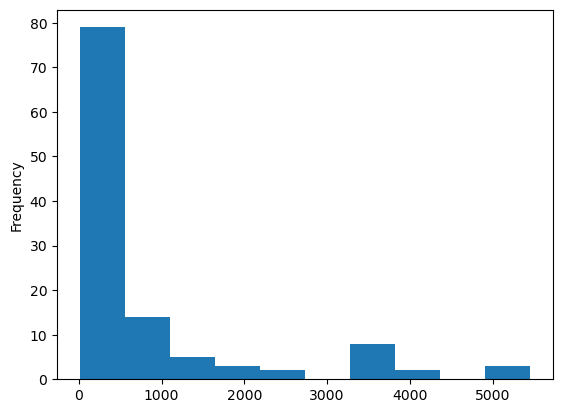

In [22]:
df_parole["Texte"].str.len().plot(kind="hist")

In [23]:
# Exclure les prises de parole de "Mme la présidente"
df_parole = df_parole[df_parole["Nom_orateur"].str.strip() != "Mme la présidente"]

In [24]:
df_parole.shape

(69, 30)

In [25]:
df_parole["Texte"].str.len().describe()

count      69.000000
mean     1254.739130
std      1455.763542
min        10.000000
25%       233.000000
50%       596.000000
75%      1693.000000
max      5456.000000
Name: Texte, dtype: float64

In [28]:
df_parole["republique_present"] = df_parole["Texte"].str.contains(
    "république", case=False, na=False
)
df_parole["republique_present"].value_counts()

republique_present
False    66
True      3
Name: count, dtype: int64

In [39]:
temp_df = df_parole[df_parole["republique_present"] == True]["Texte"]

In [57]:
df_full = pd.read_csv("assemblee_debat_meta_contexte.csv")

ParserError: Error tokenizing data. C error: Expected 25 fields in line 4, saw 26


In [58]:
import pandas as pd

# Charger le CSV en ignorant les lignes corrompues
df_full = pd.read_csv("assemblee_debat_meta_contexte.csv", on_bad_lines='skip', encoding='utf-8')
print("Shape after skipping bad lines:", df_full.shape)
df_full.head()

# Pour repérer les lignes problématiques, afficher les premières lignes du fichier brut
with open("assemblee_debat_meta_contexte.csv", encoding='utf-8') as f:
    for i in range(10):
        print(f.readline().strip())

Shape after skipping bad lines: (122, 25)
UID                  , SeanceRef             , SessionRef , DateSeance       , DateSeanceJour   , NumSeanceJour, NumSeance, TypeAssemblee, Legislature, Session                    , NomFichierJO, President                                , Titre_general                                                                        , Sous_titre                                     , ID_paragraphe, Ordre_seance, Code_grammaire       , Code_style      , Code_parole, Role_debat, Nom_orateur                    , Qualite_orateur                                                                                                              , ID_orateur, stime  , Texte
CRSANR5L16S2024O1N220, RUANR5L16S2024IDS28385, SCR5A2024O1, 20240530213000000, jeudi 30 mai 2024,             3,       220, AN           ,          16, Session ordinaire 2023-2024,     20240220, Présidence de Mme Élodie Jacquier-Laforge,                                                                 

In [59]:
df_full

,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte
0,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,2,OUV_SEAN_2_1,NORMAL,,president,Mme la présidente,...,719874,1063.52,La séance est ouverte.
1,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,3,OUV_SEAN_2_2,Info Italiques,,,,...,,,(La séance est ouverte à vingt et une heures ...
2,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,9,PAROLE_GENERIQUE,NORMAL,,,Mme la présidente,...,719874,1075.52,La parole est à M. le ministre délégué chargé...
3,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,26,PAROLE_GENERIQUE,NORMAL,,,Mme la présidente,...,719874,1740.39,La parole est à Mme Estelle Youssouffa.
4,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,35,PAROLE_GENERIQUE,NORMAL,,,Mme la présidente,...,719874,2092.48,La parole est à Mme Sandrine Rousseau.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,375,PAROLE_GENERIQUE,NORMAL,,,Mme la présidente,...,719874,9404.26,La parole est à M. Paul Molac.
118,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,381,PAROLE_GENERIQUE,NORMAL,,,Mme la présidente,...,719874,9533.82,La parole est à Mme Sandrine Rousseau.
119,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,387,FIN_SEAN_1_0,NORMAL,,president,Mme la présidente,...,719874,9751.70,La suite de la discussion est renvoyée à une ...
120,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,391,FIN_SEAN_2_4,Info Italiques,,,,...,,,(La séance est levée à minuit.)
